#### Importing necessary modules

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#### Reading the dataset

In [2]:
games = pd.read_csv("datasets/Board Game Review/games.csv")

In [3]:
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


#### Plotting the dataset

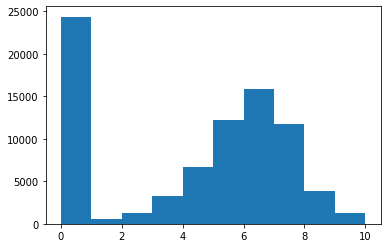

In [5]:
plt.hist(games['average_rating'])
plt.show()

In [8]:
## Print the first row of all the games with zero score
print(games[games['average_rating'] == 0].iloc[0])

print('\n\n')

## Print the first row of all the games with score greater than 0
print(games[games['average_rating'] > 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object



id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime       

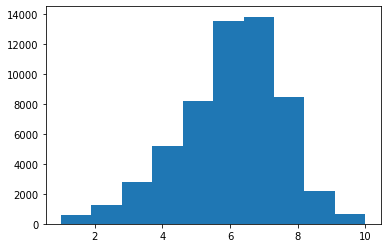

In [9]:
## Remove any row without user reviews
games = games[games['users_rated'] > 0]

## Remove any rows with missing values
games = games.dropna(axis = 0)

## Make a histogram of all the average rating
plt.hist(games['average_rating'])
plt.show()

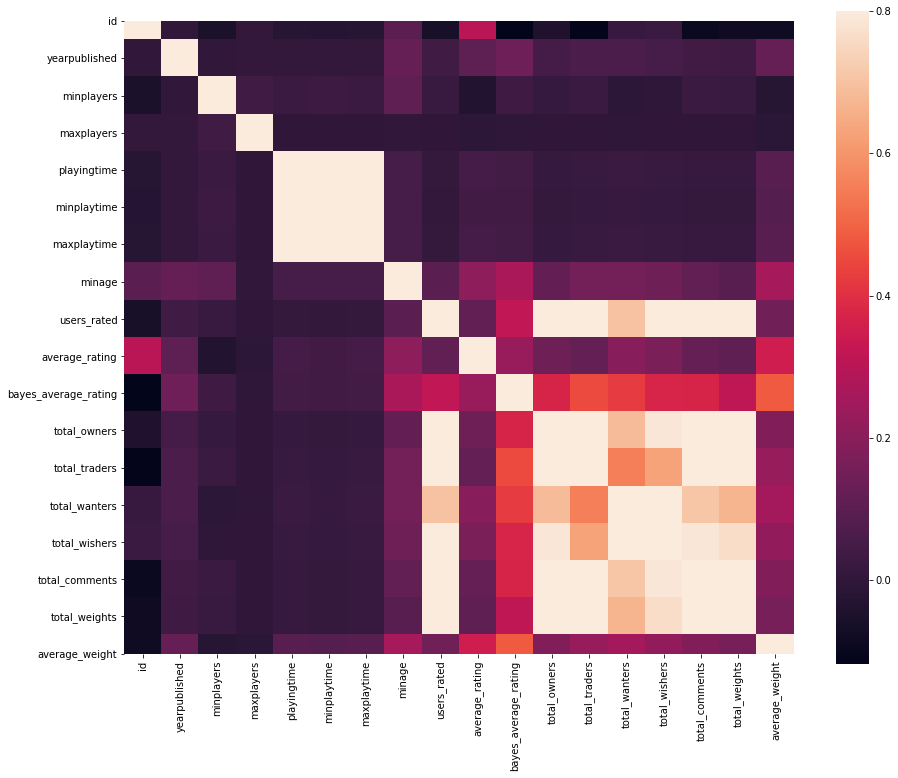

In [12]:
## Correlation matrix
cormat = games.corr()
fig = plt.figure(figsize=(15,12))

sns.heatmap(cormat, vmax = .8, square = True)
plt.show()

#### Splitting the dataset

In [13]:
## Get all columns from the dataframe
columns = games.columns.tolist()

## Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating","type","name","id"]]

## Store the variable we'll be predicting on
target = "average_rating"

In [14]:
## Generate training and test datasets
train = games.sample(frac=0.8, random_state = 1)

In [15]:
test = games.loc[~games.index.isin(train.index)]

In [16]:
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


#### Linear Regression

In [17]:
## Import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Initialize the model class
lr = LinearRegression()

## Fit the model to our training data
lr.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
## Generate the predictions for the test set
predictions = lr.predict(test[columns])

## Compute error between test predictions and actual values
mean_squared_error(predictions, test[target])

2.0788190326293243

#### Random Forest Model

In [20]:
from sklearn.ensemble import RandomForestRegressor

## Initialize the model
rfr = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state= 1)

## Fit to the data
rfr.fit(train[columns], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [21]:
## Make Predictions
predictions = rfr.predict(test[columns])

## Compute the errors
mean_squared_error(predictions, test[target])

1.4458560046071653

In [22]:
## Make Predictions with both models

rating_lr = lr.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_rfr = rfr.predict(test[columns].iloc[0].values.reshape(1,-1))

## Print the results
print(rating_lr)
print(rating_rfr)

[8.12061283]
[7.91373581]


In [23]:
## Actual Value
test[target].iloc[0]

8.07933